<a href="https://colab.research.google.com/github/MuayThaiLegz/PracticeCrazy/blob/main/Artificial_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2023-05-23 14:38:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test’

adult.test          100%[===================>]   1.91M  2.09MB/s    in 0.9s    

2023-05-23 14:38:19 (2.09 MB/s) - ‘adult.test’ saved [2003153/2003153]



In [4]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2023-05-23 14:38:52--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  3.64MB/s    in 1.0s    

2023-05-23 14:38:53 (3.64 MB/s) - ‘adult.data’ saved [3974305/3974305]



In [5]:
import pandas as pd
train = pd.read_csv(
    'adult.data',
    names=['age', 'workclass', 'fnlwgt',
             'education', 'education-num',
             'marital-status', 'occupation',
             'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', '50k']
             )
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [7]:
#!pip install category_encoders

import category_encoders as ce

X = train.drop('50k', axis=1)
encoder = ce.OrdinalEncoder(cols=list(X.select_dtypes(include='object').columns)[:])
encoder.fit(X, train['50k'])
X_cleaned = encoder.transform(X)

X_cleaned.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2


In [17]:
encoder = ce.OneHotEncoder(cols=list(X.select_dtypes(include='object').columns)[:])
encoder.fit(X, train['50k'])
X_cleaned = encoder.transform(X)

In [18]:
x_cleaned_cols = X_cleaned.columns

In [19]:
[int(val) for val in [True, False]]

[1, 0]

In [20]:
import numpy as np
import os
from sklearn.metrics.cluster import adjusted_mutual_info_score


In [29]:
y = np.zeros((len(X_cleaned), 2))
y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [30]:

y[:, 0] = train['50k'].apply(lambda x: x == ' <=50K')

y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 0.]])

In [31]:


y[:, 1] = train['50k'].apply(lambda x: x == ' >50K')

In [32]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [22]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_cleanedSKL = standard_scaler.fit_transform(X_cleaned)

In [23]:
X_cleaned.to_csv('adult_before_training.csv', index=False)

In [25]:
import joblib
joblib.dump([encoder, standard_scaler], 'adult_encoder.joblib')

['adult_encoder.joblib']

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='selu', input_dim=108))
model.add(Dense(2, activation='softmax'))
model.compile(
    optimizer='rmsprop',
    loss='categorical_hinge',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2180      
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 2,222
Trainable params: 2,222
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_cleaned, y,epochs=50)

Epoch 1/50
1018/1018 [==============================] - 3s 2ms/step - loss: 0.4814 - accuracy: 0.7593
Epoch 2/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4816 - accuracy: 0.7592
Epoch 3/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4816 - accuracy: 0.7592
Epoch 4/50
1018/1018 [==============================] - 3s 3ms/step - loss: 0.4816 - accuracy: 0.7592
Epoch 5/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4815 - accuracy: 0.7593
Epoch 6/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4815 - accuracy: 0.7593
Epoch 7/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4815 - accuracy: 0.7593
Epoch 8/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4815 - accuracy: 0.7593
Epoch 9/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.4814 - accuracy: 0.7593
Epoch 10/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.481

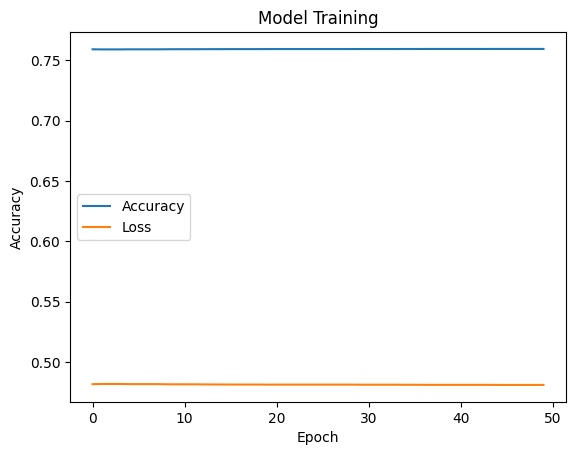

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='center left')


In [36]:
import pandas as pd

cols = ['age', 'workclass', 'fnlwgt',
             
             'education', 'education-num',
             'marital-status', 'occupation',
             'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', '50k']

test = pd.read_csv(
    'adult.test',
    names=cols
)

test.drop(0, axis=0, inplace=True)
test.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [37]:
X_test = standard_scaler.transform(encoder.transform(test[cols[:-1]]))
predictions = model.predict(X_test)

509/509 [==============================] - 1s 1ms/step


In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
target_lookup = {' <=50K.': 0, ' >50K.': 1 }

In [40]:
y_test = test['50k'].apply(
    lambda x: target_lookup[x]
).values
roc_auc_score(y_test, predictions.argmax(axis=1))

0.5083038351690883

In [42]:
#!pip install eli5

In [43]:
from eli5.permutation_importance import get_score_importances

def score(data, y=None, weight=None):
  return model.predict(data).argmax(axis=1)

base_score, score_decreases = get_score_importances(score, X_test, y_test)
feature_importances = np.mean(score_decreases, axis=0).mean(axis=1)

509/509 [==============================] - 1s 1ms/step


KeyboardInterrupt: ignored

In [44]:
import operator


feature_importances_annotated = {col: imp for col, imp in zip(x_cleaned_cols, feature_importances)}
sorted_feature_importances_annotated = sorted(feature_importances_annotated.items(), key=operator.itemgetter(1), reverse=True)

for k, v in sorted_feature_importances_annotated:
  print('{k}: {v}'.format(k=k, v=v))

NameError: ignored

In [1]:
#!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#!pip install -q openml

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_Date       733 non-null    object 
 1   DOB                    733 non-null    object 
 2   MemberID               733 non-null    object 
 3   Emp_First_Name         733 non-null    object 
 4   Emp_Last_Name          733 non-null    object 
 5   Gender                 733 non-null    object 
 6   Age                    733 non-null    float64
 7   Age_Group              733 non-null    object 
 8   Location               733 non-null    int64  
 9   Active_Status          733 non-null    object 
 10  Covg_Status            733 non-null    object 
 11  Plan                   733 non-null    object 
 12  Prov_Name              733 non-null    object 
 13  Prov_ID                733 non-null    int64  
 14  Prov_Spec_Desc         733 non-null    object 
 15  Prov_s

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_Date       733 non-null    object 
 1   DOB                    733 non-null    object 
 2   MemberID               733 non-null    object 
 3   Emp_First_Name         733 non-null    object 
 4   Emp_Last_Name          733 non-null    object 
 5   Gender                 733 non-null    object 
 6   Age                    733 non-null    float64
 7   Age_Group              733 non-null    object 
 8   Location               733 non-null    int64  
 9   Active_Status          733 non-null    object 
 10  Covg_Status            733 non-null    object 
 11  Plan                   733 non-null    object 
 12  Prov_Name              733 non-null    object 
 13  Prov_ID                733 non-null    int64  
 14  Prov_Spec_Desc         733 non-null    object 
 15  Prov_s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                733 non-null    float64
 1   Location           733 non-null    int64  
 2   Allowed            733 non-null    float64
 3   Discount           733 non-null    float64
 4   Paid               733 non-null    float64
 5   Deductible         733 non-null    float64
 6   month              733 non-null    int64  
 7   Age_Group_Factors  733 non-null    int64  
 8   season_Factors     733 non-null    int64  
 9   Gender_Factors     733 non-null    int64  
 10  Region_Factors     733 non-null    int64  
 11  Condition_Factors  733 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 68.8 KB


In [79]:
y

,Charged
0,261.00
1,7.00
2,16.00
3,83.00
4,30.00
...,...
728,34.33
729,98.00
730,4032.00
731,1059.38


In [80]:
#!pip install openml_speed_dating_pipeline_steps
#pip install -q category_encoders

In [81]:
import openml_speed_dating_pipeline_steps as pipeline_steps

In [82]:

from sklearn.base import BaseEstimator, TransformerMixin


class RangeTransformer(BaseEstimator, TransformerMixin):
    '''
    A custom transformer for ranges.

    Parameters
    ----------
    range_features : list[str]
        This specifies the column names with the ranges. 

    Attributes
    ----------
    range_features : list[str]
        Here we store the columns with range features.
    suffix : this determines how we will rename the transformed features.
    '''
    def __init__(self, range_features=[], suffix='_range/mean'):
        assert isinstance(range_features, list)
        self.range_features = range_features
        self.suffix = suffix
    
    def fit(self, X, y=None):
        '''Nothing to do here
        '''
        return self
    
    def transform(self, X, y=None):
        range_data = pd.DataFrame()
        for col in self.range_features:
            range_data[str(col) + self.suffix] = X[col].apply(
                lambda x: self._encode_ranges(x)
            ).astype(float)
        return range_data

    @staticmethod
    def _encode_ranges(range_str):
        splits = range_str[1:-1].split('-')
        range_max = float(splits[-1])
        range_min = float('-'.join(splits[:-1]))
        return sum([range_min, range_max]) / 2.0


In [2]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce


ordinal_encoder = ce.OrdinalEncoder(
    cols=None,  # all features that it encounters
    handle_missing='return_nan',
    handle_unknown='ignore'
).fit(X)

imputer = IterativeImputer(
    imputation_order='ascending',  # also try 'descending'
    random_state=0,
    max_iter=10  # try higher values
)

preprocessor = ColumnTransformer(
    transformers=[
        #('ranges', range_transformer, range_features),
        ('cat', ordinal_encoder, categorical_features)],
    remainder='passthrough'
)

NameError: ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Empty DataFrame


In [10]:
from imblearn.ensemble import BalancedRandomForestRegressor


ImportError: ignored

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openml
dataset = pd.read_csv('PatientInfoPlusMatches.csv')
dataset['Age_Group'] = dataset['Age_Group'].factorize()[0]
dataset['season'] = dataset['season'].factorize()[0]
dataset['Gender'] = dataset['Gender'].factorize()[0]
dataset['Region'] = dataset['Region'].factorize()[0]

dataset['Condition'] = dataset['Condition'].factorize()[0]

X = dataset.select_dtypes(include=['int','float'])
y = X[['Charged']]
X.drop(['year','Prov_ID','Charged'], axis=1, inplace=True)


from sklearn.ensemble import (
    GradientBoostingRegressor,
     RandomForestRegressor,AdaBoostRegressor 
)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

def create_model(n_estimators=20):
    return Pipeline(
        steps=[
              ('rf', AdaBoostRegressor(
                  n_estimators=n_estimators,
                  estimator=RandomForestRegressor()
                  ))]
    )

  
#y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42
)

performances = []
for n_estimators in [20, 50, 100, 200, 500]:
    resampling_pipeline_bclf = create_model(n_estimators)
    resampling_pipeline_bclf.fit(X_train, y_train)
    y_predicted = resampling_pipeline_bclf.predict(X_test)
    err = mean_squared_error(y_test, y_predicted)
    print('auc: {}'.format(err))
    performances.append(err)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


auc: 1294818.8128471205


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


auc: 1464908.3415970863


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


auc: 1296279.80606666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


auc: 1287641.99662734


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


auc: 1873812.1906348711


In [15]:
print(performances)

[1294818.8128471205, 1464908.3415970863, 1296279.80606666, 1287641.99662734, 1873812.1906348711]


In [16]:
y_predicted = resampling_pipeline_bclf.predict(X_test)

In [17]:
y_predicted

array([1126.82082262, 1116.09569766, 1202.37515762,  693.47562348,
       1541.9195    , 1158.9015    ,  258.33645869,  479.5359    ,
        766.69722255,  450.48654933, 1744.15423374, 1276.24281588,
       1113.51160192,  842.33628922,  842.56      , 1349.599     ,
       1258.535     ,  594.17873153, 1167.41322496, 2486.4509519 ,
       2486.4509519 , 1167.41322496, 1423.49685624,  842.56      ,
        318.91753276, 1145.79974704, 1265.845     ,  715.16479406,
       1156.14575804, 1033.02243348, 1301.2425    ,  318.91753276,
       1950.88377675, 1057.09429604, 1301.2425    , 1162.82596354,
        733.6673    , 1645.92015951, 1300.09332315,  891.412     ,
       2700.37159191,  202.96374444,  836.00759996, 1437.32059463,
        740.14508608, 1202.37515762, 1437.69142093, 1236.52321966,
        837.05018048,  331.33203532, 1315.2629    , 1138.41404448,
        928.39286667,  628.17869204, 1159.96561701, 1236.52321966,
       1375.46046673,  775.1968    , 1161.90932738,  534.175  